<a href="https://colab.research.google.com/github/meysam-kazemi/face_detection_with_5_landmarks/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imutils
import time
import dlib
import cv2
import matplotlib.pyplot as plt
import re
import multiprocessing

In [2]:
%cd drive/MyDrive/landmark/ibug_300W_large_face_landmark_dataset/

/content/drive/MyDrive/landmark/ibug_300W_large_face_landmark_dataset


In [3]:
%ls

afw/                           labels_ibug_300W_train.xml
helen/                         labels_ibug_300W.xml
ibug/                          lfpw/
image_metadata_stylesheet.xsl  predictor_5_landmarks.dat
labels_5landmarks_test.xml     predictor.dat
labels_5landmarks_train.xml    train.csv
labels_ibug_300W_test.xml


## edit xml file

In [4]:
def select_landmarks(landmarks,input,output):
  part = re.compile("part name='[0-9]+'")
  rows = open(input).read().strip().split("\n") # read input xml file
  output = open(output, "w") # open a file for save output xml file
  for row in rows:
    parts = part.findall(row)
    if len(parts)==0 :
        output.write(f"{row}\n")
    else:
        i = row.find("name='")
        j = row.find("'", i + len("name='") + 1)
        name = int(row[i + len("name='"):j])
        if name in landmarks:
		       output.write(f"{row}\n")
  output.close()

lands = {17,26,33,48,54}
select_landmarks(lands,"labels_ibug_300W_train.xml","labels_5landmarks_train.xml")
print("train data complete")
select_landmarks(lands,"labels_ibug_300W_test.xml","labels_5landmarks_test.xml")
print("test data complete")

train data complete
test data complete


## train

In [5]:
def predictor(data_path,model_path):
  options = dlib.shape_predictor_training_options()
  options.tree_depth = 4
  options.nu = 0.1
  options.cascade_depth = 15
  options.feature_pool_size = 400
  options.num_test_splits = 50
  options.oversampling_amount = 5
  options.oversampling_translation_jitter = 0.1
  options.be_verbose = True
  options.num_threads = multiprocessing.cpu_count()
  dlib.train_shape_predictor(data_path, model_path, options)
predictor("labels_5landmarks_test.xml","predictor_5_landmarks.dat")

In [6]:
options = dlib.shape_predictor_training_options()
options.be_verbose = True
dlib.train_shape_predictor("labels_5landmarks_test.xml","predictor.dat", options)


In [7]:
%ls ../

'face detection.ipynb'                    shape_predictor_5_face_landmarks.dat
 ibug_300W_large_face_landmark_dataset/   Untitled0.ipynb
 image.jpg                                Untitled1.ipynb
 img.jpg


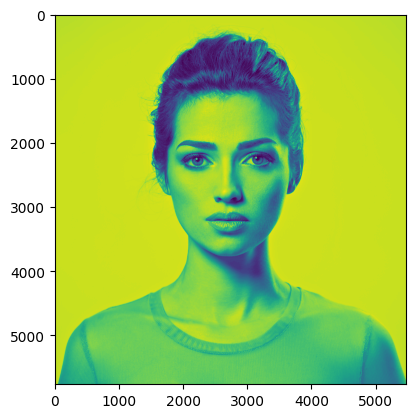

In [8]:
from imutils import face_utils
img = cv2.imread("../image.jpg",0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("predictor.dat")
rects = detector(img,0)
for rect in rects:
  (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
  # cv2.rectangle(img, (bX, bY), (bX + bW, bY + bH),(0, 255, 0), 1)
  shape = predictor(img, rect)
  shape = face_utils.shape_to_np(shape)
  for (x, y) in shape:
    cv2.circle(img, (x, y), 0, (255, 255, 255), -1)
plt.imshow(img)

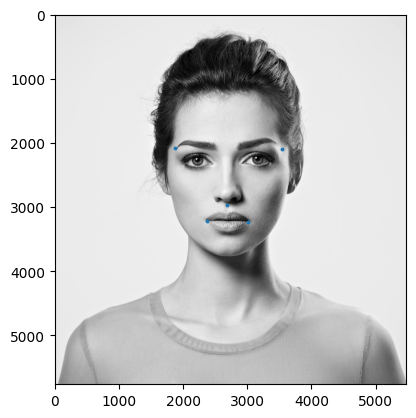

In [9]:
plt.imshow(img,'gray')
plt.scatter(shape[:,0],shape[:,1],s=3)